In [1]:
import os
from broad_qc import read_dataframes, calculate_metrics, format_metrics, plot_reads_vs_sampleID_reversed, extract_samples_from_files

In [2]:
metrics_path = '/gale/netapp/seq11/illumina_runs/qc_metrics/'
file = 'LP-TXSTPQ969109_Broad_QC__SALK052_SALK054__227FLVLT4.csv'
pool_string = "SALK052_SALK054"

In [3]:
pool_strings = pool_string.split("_")
# Create the list of file paths using list comprehension
pool_files = [os.path.join(metrics_path, pool) for pool in pool_strings]
print(pool_files)
file_path = f'{metrics_path}/{file}'

['/gale/netapp/seq11/illumina_runs/qc_metrics/SALK052', '/gale/netapp/seq11/illumina_runs/qc_metrics/SALK054']


In [4]:
demux_stats, top_unknown_barcodes = read_dataframes(file_path)
metrics = calculate_metrics(demux_stats, top_unknown_barcodes)
formatted_metrics = format_metrics(metrics)

In [5]:
print("@card Broad sequencing QC metrics accepted")
for key, value in formatted_metrics.items():
        print(f"{key}: {value}")

@card Broad sequencing QC metrics accepted
run_yield: 8,555,974,522,507 Reads PF
run_yield_excluding_undetermined: 8,017,757,989,159 Reads PF
total_reads: 29,115,103,188 Reads PF
assumed_phiX_reads: 678,593,069 Reads PF
percent_phix_assumed: 2.33%
pool_with_fewest_reads_in_a_lane: UWA7648_CX2324_THM1_2_P9-1-G9: 5,912,638


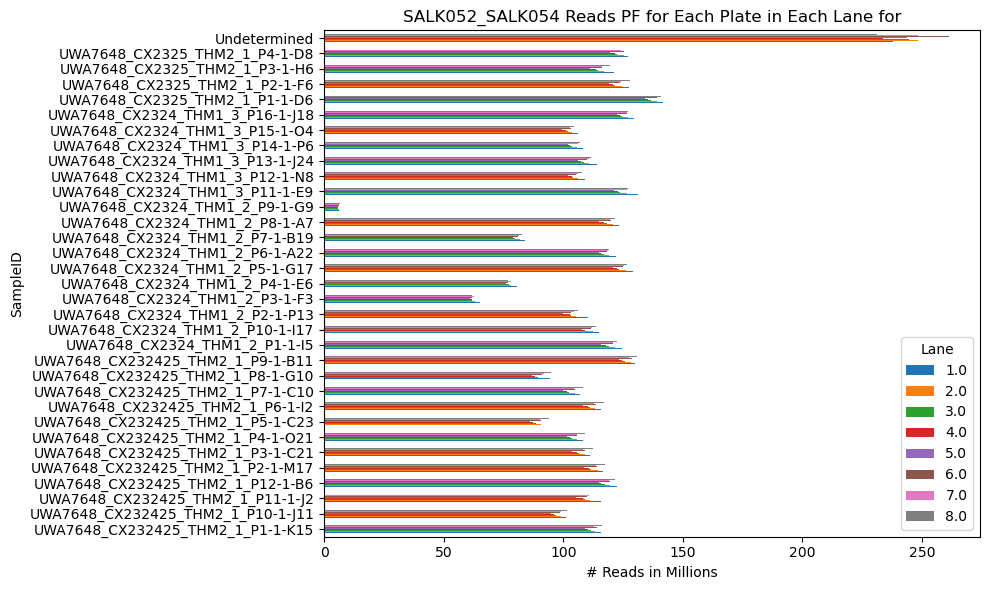

<Figure size 1000x600 with 0 Axes>

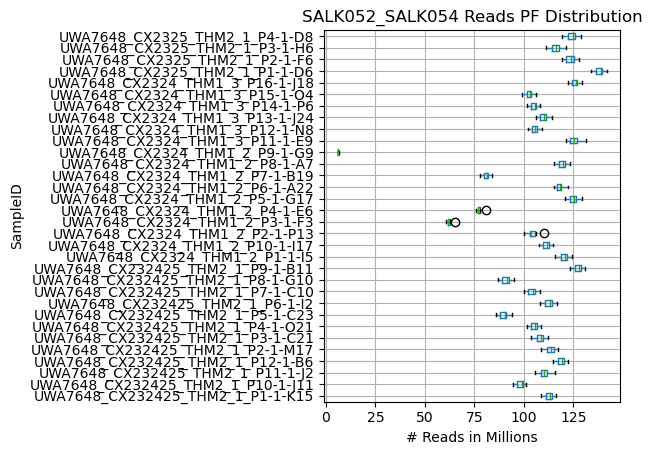

In [6]:
plot_reads_vs_sampleID_reversed(demux_stats, metrics_path ,pool_string)

In [8]:
pools = extract_samples_from_files(demux_stats, pool_files)

In [9]:
# Initialize an empty list to store formatted_metrics
all_formatted_metrics = []

for file_path, pool in pools.items():
    metrics = calculate_metrics(pool, top_unknown_barcodes)
    formatted_metrics = format_metrics(metrics)
    
    # Append the formatted_metrics dictionary to the list
    all_formatted_metrics.append(formatted_metrics)
    
    #print(f"run_yield: {formatted_metrics.get('run_yield')}")
    #print(f"pool_with_fewest_reads_in_a_lane: {formatted_metrics.get('pool_with_fewest_reads_in_a_lane')}")
        
    #plot_reads_vs_sampleID_reversed(pool, metrics_path , os.path.basename(file_path))

In [12]:
for pool, metrics in zip(pool_strings, all_formatted_metrics):
    print(f"{pool} pool_with_fewest_reads_in_a_lane: {metrics.get('pool_with_fewest_reads_in_a_lane')} Reads PF")

SALK052 pool_with_fewest_reads_in_a_lane: UWA7648_CX232425_THM2_1_P5-1-C23: 86,078,926 Reads PF
SALK054 pool_with_fewest_reads_in_a_lane: UWA7648_CX2324_THM1_2_P9-1-G9: 5,912,638 Reads PF


In [11]:
for pool, metrics in zip(pool_strings, all_formatted_metrics):
    print(f"{pool} run_yield: {metrics.get('run_yield')}")

SALK052 run_yield: 4,208,620,962,620 Reads PF
SALK054 run_yield: 3,809,137,026,539 Reads PF
